# PERKENALAN

NAMA    : Dzaki Ahmad Fardian

Batch   : HCK-024

Pada GC6 ini saya akan melakukan sebuah pemodelan Machine Learning Clustering. Model ini saya buat dengan tujuan membuat Segmentasi antara Customer. Clustering ini berdasarkan data dari pemakaian kredit customer selama 6 bulan terakhir.

# QUERY SQL

Di bawah ini adalah Query yang saya pakai untuk mengambil datasetnya. Di sini saya pakai condition untuk mengambil data dengan ID genap (hasil bagi/Modulus 2 = 0)

``` sql
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_024_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
```

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
import json
import pickle

# DATA LOADING

In [2]:
df = pd.read_csv('P1G6_Set_1_dzaki_ahmad_fardian.csv')

In [3]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [4]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


Data set ini terdiri atas column :

- CUST_ID                           : Id customer.
- BALANCE                           : Sisa saldo yang bisa dipakai.
- BALANCE_FREQUENCY                 : Frequency perubahan saldo (frequency = seberapa sering).
- PURCHASES                         : total uang yang belanjakan customer.
- ONEOFF_PURCHASES                  : Total uang pembelian sekali bayar, tanpa cicilan.
- INSTALLMENTS_PURCHASES            : Total uang pembelian dengan cicilan.
- CASH_ADVANCE                      : Total uang yang ditarik menggunakan kartu kredit.
- PURCHASES_FREQUENCY               : Frequency pembelian.
- ONEOFF_PURCHASES_FREQUENCY        : Frequency pembelian sekali bayar.
- PURCHASES_INSTALLMENTS_FREQUENCY  : Frequency pembelian cicilan.
- CASH_ADVANCE_FREQUENCY            : Frequency penarikan uang.
- CASH_ADVANCE_TRX                  : Jumlah transaksi dalam penarikan uang dengan kartu kredit.
- PURCHASES_TRX                     : Jumlah transaksi pembelian.
- CREDIT_LIMIT                      : Batas maksimum kredit.
- PAYMENTS                          : Total uang yang dibayar customer.
- MINUMUM_PAYMENTS                  : Pembayaran minimum yang dilakukan pelanggan.
- PRC_FULL_PAYMENTS                 : persentase pembayaran full.
- TENURE                            : Jumlah berapa bulan customer memakai kredit.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat Missing value untuk column 'MINIMUM_PAYMENTS' dan 'CREDIT_LIMIT'.

Missing Value 'MINIMUM_PAYMENTS'

In [7]:
df[df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.0,NaN,0.0,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.0,NaN,0.0,8
6,4360,2730.843802,1.000000,2900.00,2900.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2900.0,0.0,NaN,0.0,8
8,5884,18.885677,0.375000,57.00,57.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.0,NaN,0.0,8
27,1830,0.000000,0.000000,66.75,0.00,66.75,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,4000.0,0.0,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,7492,2242.311686,1.000000,437.00,97.00,340.00,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,NaN,0.0,12
4087,4290,1948.434315,1.000000,324.30,324.30,0.00,1468.083560,0.166667,0.166667,0.000000,0.166667,4,4,5000.0,0.0,NaN,0.0,12
4091,5468,4618.091584,1.000000,541.68,541.68,0.00,3580.753362,0.166667,0.166667,0.000000,0.166667,2,2,8500.0,0.0,NaN,0.0,12
4144,4234,27.716642,0.100000,0.00,0.00,0.00,480.104401,0.000000,0.000000,0.000000,0.100000,1,0,5000.0,0.0,NaN,0.0,10


Untuk 'MINIMUM_PAYMENT' akan aku fill dengan median. Pemilihan median sebagai fill ini aku lakukan sebagai antisipasi jika datanya memiliki outliers.

In [8]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11452\3610250640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [9]:
df[df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


MISSING VALUE 'CREDIT_LIMIT'

In [10]:
df[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3843,4956,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Untuk Credit Limit, karena hanya 1 yang missing value maka aku drop.

In [11]:
df = df.dropna(subset=['CREDIT_LIMIT'])

In [12]:
df[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [13]:
df.duplicated().sum()

0

Saya drop karena 'CUST_ID' tidak akan dipakai saat modeling.

In [14]:
df.drop(['CUST_ID'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS (EDA)

**Nomor 1. Apakah terdapat pola antara pengaruh TENURE dengan variabel PURCHASES, BALANCE, dan PAYMENTS ? Buatlah visualisasi yang menunjukkan hubungan ini berikan rekomendasi bisnis untuk tim marketing mengenai hal ini.**

Di sini saya tampilkan jumlah data dari beberapa column untuk melihat persebaran datanya.

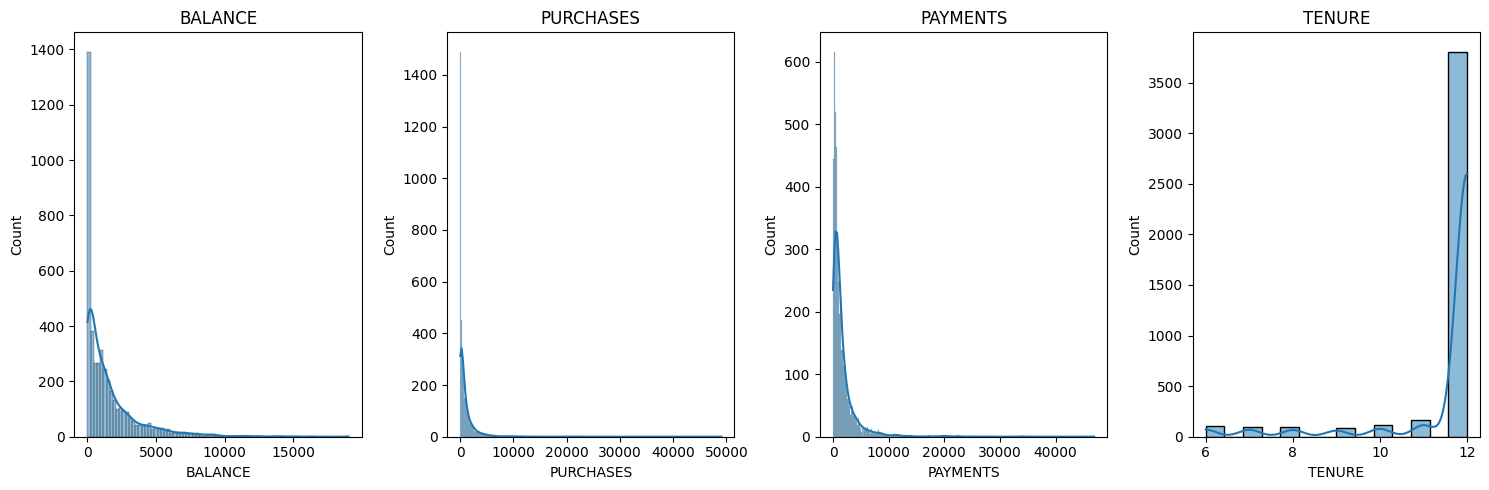

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
for i, column in enumerate(['BALANCE', 'PURCHASES', 'PAYMENTS', 'TENURE']):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout() 

**INSGIHT**

- BALANCE  : Kebanyakan customer memiliki BALANCE (hutang/jumlah yang harus dibayar) di bawah 5000.
- PURCHASE : Kebanyakan customer juga melakukan pembelian di bawah 5000.
- PAYMENT  : Jumlah uang yang telah dibayar customer terpusat pada angka di bawah 10.000.
- TENURE   : Kebanyakan dari credit card customer dari Bank ABC ini sudah berlangganan selama 12 bulan.

Kemudian saya akan melakukan visualisasi heatmap dengan correlation matrix yang diambil menggunakan korelasi spearman.

**Pemakaian spearman karena sebelumnya terlihat ada outliers.**

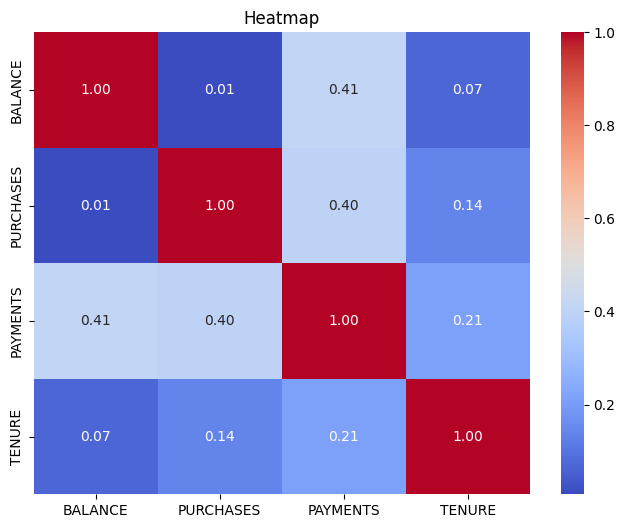

In [16]:
column = df[['BALANCE', 'PURCHASES', 'PAYMENTS', 'TENURE']]
correlation_matrix = column.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap")
plt.show()

**INSIGHT**

- BALANCE memiliki korelasi terhadap PAYMENTS namun tidak begitu kuat. Artinya customer yang berhutang banyak melakukan pembayaran dengan jumlah banyak, begitu sebaliknya yang memiliki hutang sedikit juga membayar sedikit. Tetapi korelasinya lemah jadi informasi ini tidak begitu bisa diandalkan.

- Purchases memiliki korelasi terhadap PAYMENTS namun tidak begitu kuat. Artinya seberapa besar cutomer melakukan pembelian, besar juga total uang yang 
dibayarkan oleh customer. Walaupun tidak terlalu pasti karena korelasinya tidak begitu kuat.

- Untuk BALANCE dengan PURCHASE tidak memiliki korelasi sama sekali. Artinya Jumlah uang yang harus dibayarkan saat ini tidak selalu sama besar dengan spending customer. Jadi tidak selalu orang yang spending kecil, hutangnya kecil atau sebaliknya tidak selalu orang yang spending besar, hutangnya besar.
+ JAWABAN NOMOR 1: 
- Untuk **BALANCE dengan TENURE** juga tidak memiliki korelasi. Artinya yang sudah lama memakai belum tentu punya hutang banyak atau sedikit.

- **PURCHASES dengan TENURE** memiliki korelasi yang sangat lemah. Berarti lamanya seseorang berlangganan tidak mempengaruhi jumlah pembelian yang dilakukan.

- **PAYMENT dengan TENURE** memiliki korelasi tapi korelasinya lemah. Artinya lamanya seseorang berlangganan kredit tidak begitu mempengaruhi pembayaran yang dilakukan oleh mereka.

**Nomor 2. Apakah nasabah dengan CREDIT_LIMIT yang tinggi cenderung lebih sering melakukan pembelian ? Lakukanlah analisis untuk mengetahui bagaimana CREDIT_LIMIT mempengaruhi frekuensi pembelian (PURCHASES_FREQUENCY). Buatlah visualisasi yang menunjukkan hubungan ini berikan rekomendasi bisnis untuk tim marketing mengenai hal ini.**



Text(0.5, 1.0, 'CREDIT LIMIT VS PURCHASE FREQUANCY')

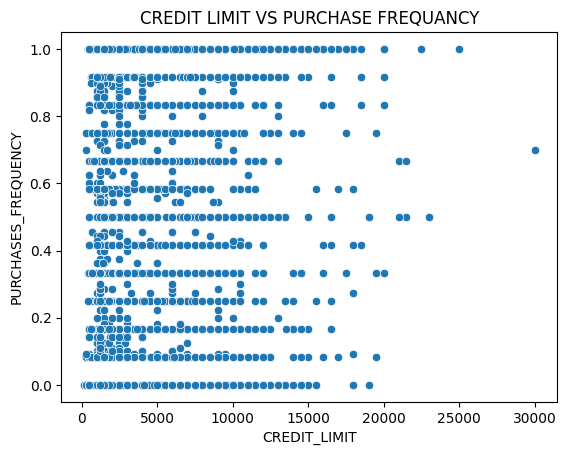

In [17]:
sns.scatterplot(data=df,x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY')
plt.title('CREDIT LIMIT VS PURCHASE FREQUANCY')

**INSIGHT**

- Di sini saya misalkan CREDIT_LIMIT rendah (0-9.999), sedang (10.000-20.000) dan besar (20.001-30.000).
- Dari visualisasi di atas untuk CREDIT_LIMIT yang besar (CREDIT_LIMIT 20.001-30.000) kebanyakan berada pada Frequency paling kecil 0.5 (sekitar 4 orang) yang lainnya sekitar 0.7 (sekitar 3 orang) dan terakhir berfrequency 1 (sekitar 2 orang).
- Artinya **orang dengan Frequency besar cenderung lebih sering belanja (Frequencynya tinggi).**
+ **Tapi bukan berarti orang dengan CREDIT_LIMIT sedikit tidak sering belanja.**
+ Hal ini bisa kita lihat dari visualisasi bahwa orang dengan CREDIT_LIMIT rendah (0-9.999) dan sedang (10.000-20.000) memiliki variasi Frequency yang berbeda-beda. Ada yang kecil (0-0,3) dan juga besar (0.8-1)

# FEATURE ENGINEERING

Pada Feature Engineering ini saya tidak melakukan handling Outliers.

**ALASAN :** 
- Data ini merupakan sebuah data keuangan.
- Tujuan dari project adalah memberikan rekomendasi untuk Cluster-Cluster tertentu. Saya khawatir jika melakukan handling outliers, data yang terhandling akan masuk ke Cluster yang tidak seharusnya.
- Oleh karena itu rekomendasinya akan menjadi kurang tepat sasaran.

In [18]:
# saya drop ID pada data loading untuk menghilangkan data categorical.
# Tapi saya tetap pisahkan num_cols untuk dipakai pada save models.
num_cols= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

In [19]:
X = df[num_cols]

X.shape

(4474, 17)

## SCALLING

Saya memakai Standard Scaller karena saya ingin menyetarakan angkanya antara 0 sampai 1. Contoh columns BALANCE dengan FREQUENCY, dimana BALANCE bisa sampai ribuan sedangkan FREQUENCY 0-1. Jika tidak saya pakai Standard Scaller tidak akan setara.

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [21]:
pca = PCA()
pca.fit(X_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

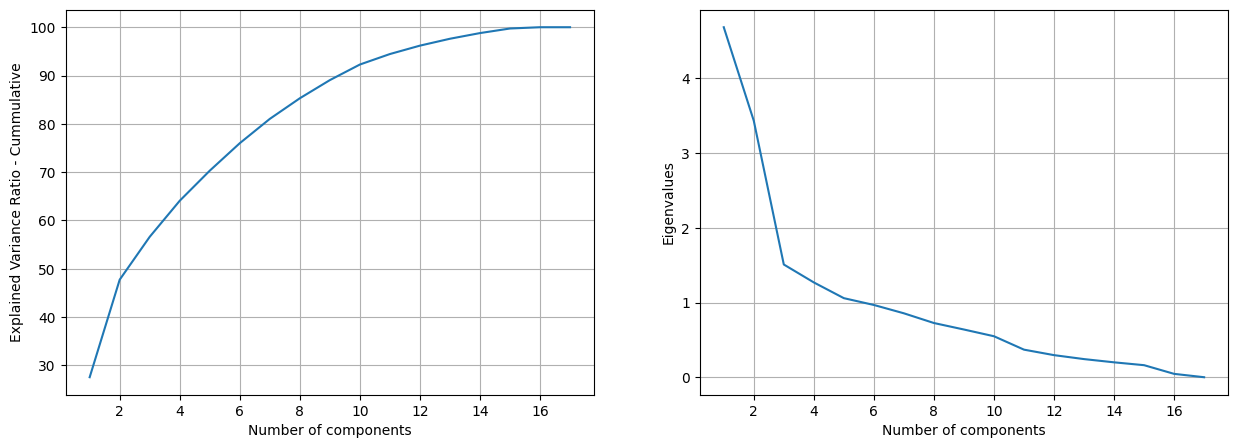

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

- Dari visualisasi di atas saya bisa mengambil jumlah komponen yang akan digunakan.

- Di sini saya ingin mempertahankan 75% data. Dari grafik (kiri) kita bisa lihat 75% ada di angka 6, sehingga jumlah kompenen yang akan dipilih adalah 6.

- Untuk di gambar lainnya (Kanan) pemilihan komponen harus memiliki nilai Eigenvalues di atas 1. Untuk Angka 6 terlihat pas di angka 1, jadi tidak masalah. Pemilihan dengan Eigenvalues ini berdasarkan Kriteria Kaiser.

- Di bawah ini saya buat variable num_features dengan nilai cumsum >= 0.75 (75%).

**Mengapa tidak 80 atau lebih ?**

- Semakin tinggi data yang dipertahankan, semakin banyak komponen yang terpilih.
- Jika komponen yang digunakan terlalu banyak, dikhawatirkan model akan terlalu kompleks sehingga akan sulit dalam pengelompokkan.

In [23]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.75) + 1
num_features

6

Train X yang sudah Scaled dengan PCA

In [24]:
pca = PCA(n_components=6)
pca.fit(X_scaled)

X_scaled_pca = pca.transform(X_scaled)

# MODELING (Evaluation, Model Creation, Training)

Di sini saya menggunakan K-Means.

Sebelum pembuatan modelnya, saya akan menentukan jumlah Cluster yang akan dibuat.

Penentuan jumlah Cluster ini menggunakan **'Elbow Method' dan 'Silhouette Score'**.

## Evaluation

### Elbow Method

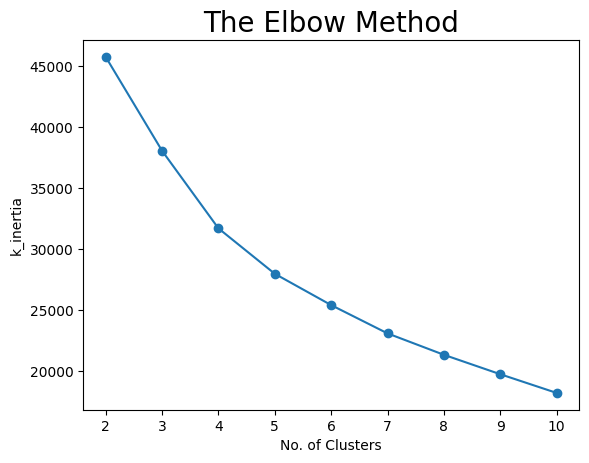

In [25]:
k_inertia = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 13)
    km.fit(X_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

Dari gambar di atas **Cluster yang bisa kita ambil adalah 4**.

**Alasan:** Karena dari 3 ke 4 terlihat penurunan tajam. Tetapi mulai dari 4 ke 5 dan seterusnya penurunan terlihat sama (stagnant). Sehingga di ambil 4, atau titik dia berhenti berubah drastis.

**Tetapi kita coba penentuan Cluster dengan Silhouette Score dulu**

### Silhouette Score

Di bawah ini function untuk mendapatkan Silhouette Score untuk masing-masing cluster dan juga visualisasinya..

In [26]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([]) 
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_

        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

Jalankan Functionnya.

For n_clusters = 2 The average silhouette_score is : 0.26100963107323183
For n_clusters = 3 The average silhouette_score is : 0.30084578274847307
For n_clusters = 4 The average silhouette_score is : 0.266470036333609
For n_clusters = 5 The average silhouette_score is : 0.25956062786326306


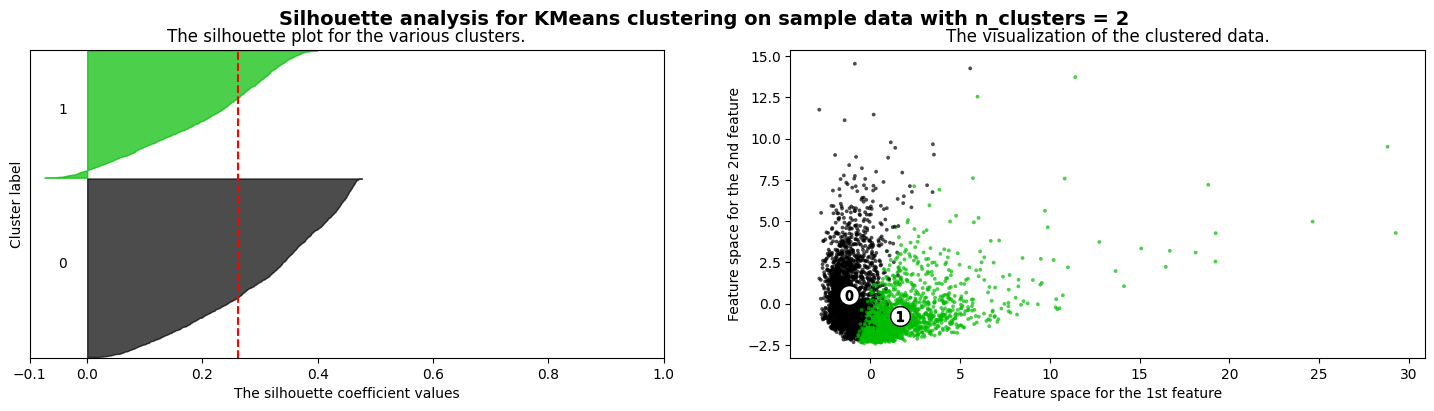

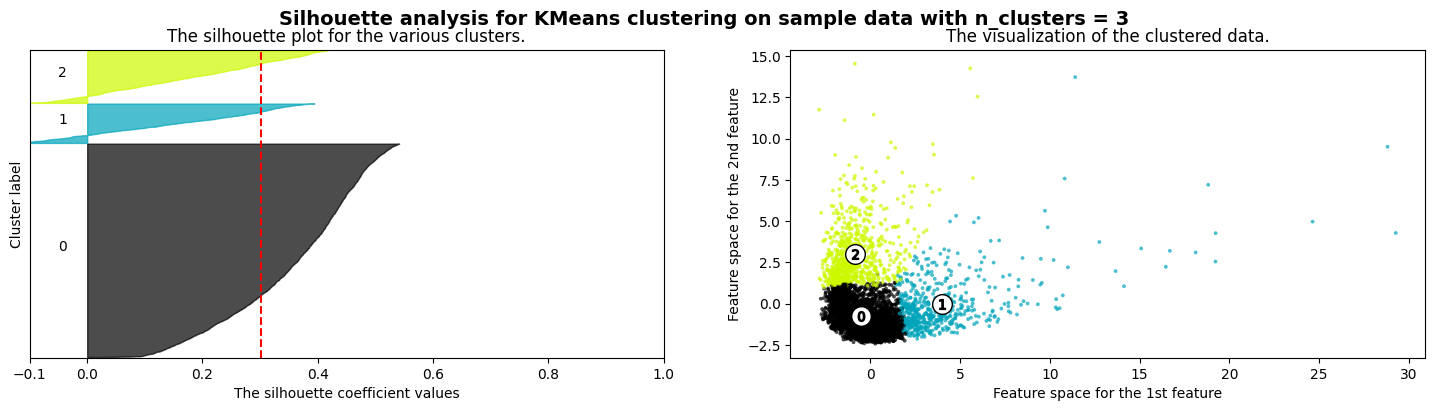

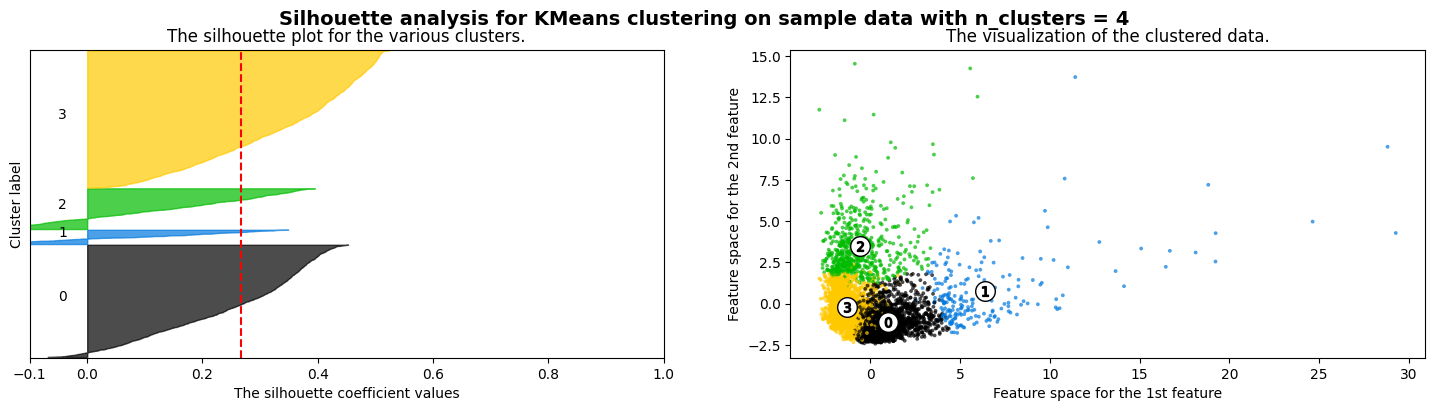

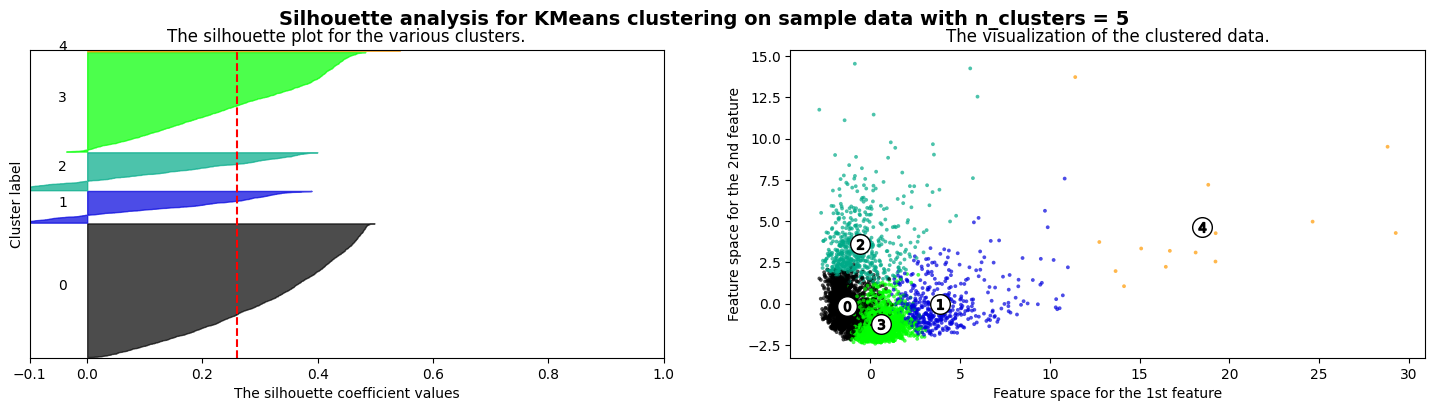

In [27]:
plot_silhouette(range(2, 6), X_scaled_pca, 13)

**Insight**

- Dari nilai Silhouette Score yang tertinggi secara berurutan dimiliki oleh Cluster 3, Cluster 4 , Cluster 2 dan Cluster 5 

- (0.300845782748473, 0.26647003633360905, 0.26100963107323194, 0.2595606278632631)
- Jadi pilihan cluster di sini adalah 3 atau 4.
- Namun dari gambar visualisasinya (sebelah kiri) untuk Cluster 3 terdapat 1 label yang memiliki nilai jauh lebih besar dari 2 label lainnya.
- Jika dibandingkan dengan Cluster 4, masih tetap ada label yang lebih kecil namun seimbang. Ada 2 yang besar dan ada 2 yang kecil.
- Untuk Cluster 5 bentuk visualisasi (sebelah kiri) juga sama seperti Cluster 4. Namun nilai Silhouette Scorenya sedikit lebih rendah.
- **Oleh karena itu saya pilih Cluster 4**

## Model Creation

In [28]:
model = KMeans(n_clusters = 4, random_state = 13)
model.fit(X_scaled_pca)

c:\ProgramData\miniconda3\envs\myenv123\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=13)

Prediksi

In [29]:
pred = model.predict(X_scaled_pca)
pred

array([3, 3, 3, ..., 2, 2, 2])

Di bawah ini jumlah iterasi yang dilakukan sampai Konvergen.

In [30]:
model.n_iter_

22

Membuat dummy dataframe dengan memberi kolom baru hasil prediksi.

In [31]:
df_kmeans = df.copy()
df_kmeans['cluster'] = pred
df_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,309.854995,0.000000,8,3
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,3
2,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,309.854995,0.000000,8,3
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,3
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,3
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,2
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,2
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,2


# EDA After Modeling

Berikut ini hasil visualisasi Clusteringnya.

<Axes: >

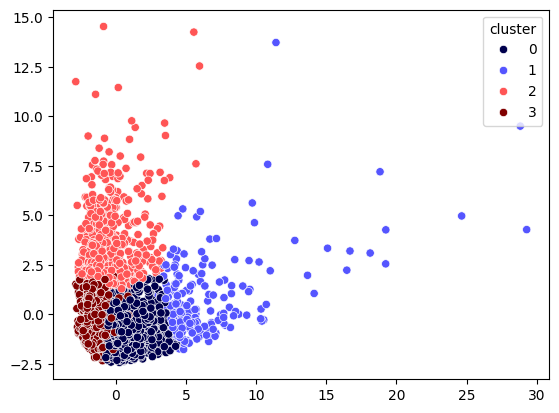

In [32]:
pca_2d = PCA(n_components=6)
pca_2d.fit(X_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['cluster'], palette='seismic')

In [33]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Pada EDA sebelumnya, saya sudah memperlihatkan hubungan antara TENURE dengan BALANCE, PURCHASES dan PAYMENTS.

Berikut saya coba visualisasikan dataframe yang mengandung hasil prediksinya (Cluster).

## Distribusi BALANCE

**Untuk pengingat, BALANCE = Sisa uang yang bisa dipakai.**

Di bawah ini kita bisa simpulkan :

- Cluster 0 mempunyai sedikit sisa BALANCE. Bisa ada 2 kemungkinan, pertama **mereka punya BALANCE dari awal sedikit** atau **mereka sudah habiskan BALANCEnya**.
- Cluster 1 mempunyai sisa BALANCE banyak. Berarti **Mungkin mereka tidak spending banyak atau memang dari awal sudah banyak spending tapi BALANCE tidak habis.**
- Cluster 2 mempunyai sisa BALANCE paling banyak.
- Cluster 3 memiliki sisa BALANCE yang sedikit seperti Cluster 0.

**Sebelum bisa menentukan apakah mereka spending banyak atau tidak, kita bisa lihat visualisasi berikutnya.**

Di bawah ini visualisasinya.

<Axes: xlabel='cluster', ylabel='BALANCE'>

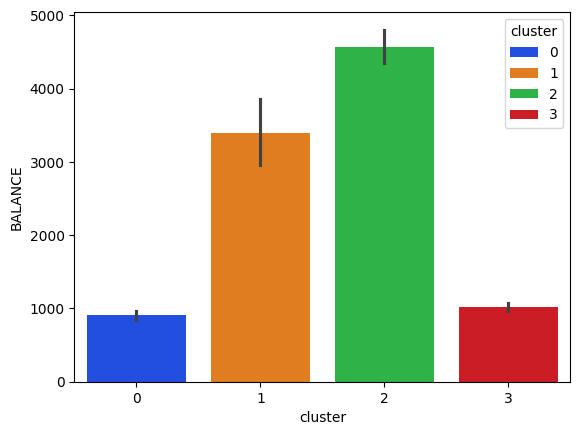

In [34]:
sns.barplot(data=df_kmeans, x="cluster", y="BALANCE",hue="cluster", palette="bright")

## Distribusi PURCHASES

Di sini kita bisa lihat bahwa :

- Cluster 0 tidak banyak spending, walaupun sisa BALANCE sedikit. Artinya mereka memang punya BALANCE yang dari awal sedikit. Kita namakan di sini **Little Spender**.
- Cluster 1 Spending banyak, walaupun sisa BALANCE banyak namun mereka spending banyak. Kita namakan di sini **Big Spender**.
- Cluster 2 Spending sangat sedikit walaupun sisa BALANCE banyak. Di sini kita namakan saja **Calon Big Spender**.
- Cluster 3 Spending lebih sedikit dari semuanya dengan sisa BALANCE hampir sama dengan Cluster 0 (Little Spender). Mungkin kita bisa kategorikan mereka sebagai orang yang mempunyai kredit sebagai pilihan darurat. Kita sebut saja **Darurat Spender**.

Di bawah ini visualisasinya.

<Axes: xlabel='cluster', ylabel='PURCHASES'>

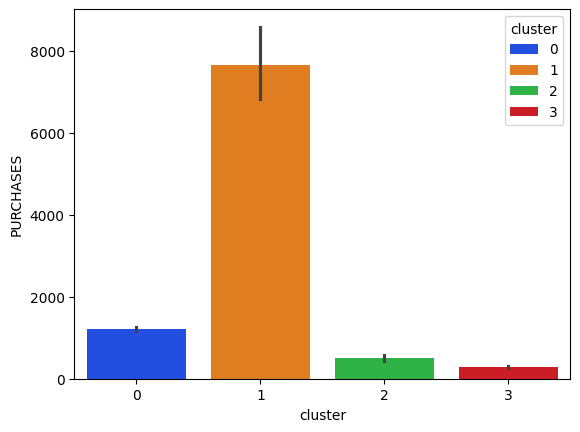

In [35]:
sns.barplot(data=df_kmeans, x="cluster", y="PURCHASES",hue="cluster", palette="bright")

## Distribusi PAYMENTS

Di sini saya ingin lihat seberapa banyak payment yang dibayarkan.

- Cluster 0 dan 3 spending sedikit, sehingga kita bisa lihat pembayaran meraka punya cocok dengan pengeluaran.
- Sebelumnya saya sebutkan Cluster 1 adalah Big spender. Di bawah ini Cluster 1 membayar dengan banyak juga, jadi saya rasa ini juga wajar.
- Untuk Cluster 2 mereka Spending sedikit tetapi membayar dalam jumlah besar. Mungkin pembayaran ini mereka lakukan untuk tunggakkan pembayaran sebelumnya.

di bawah ini visualisasinya.

<Axes: xlabel='cluster', ylabel='PAYMENTS'>

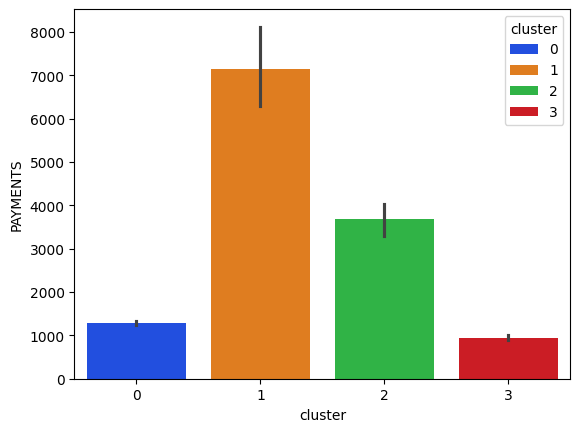

In [36]:
sns.barplot(data=df_kmeans, x="cluster", y="PAYMENTS", hue="cluster",palette="bright")

## Distribusi PRC_FULL_PAYMENT

**PENGINGAT :** PRC adalah seberapa sering mereka membayar tagihan.

Di sini saya ingin melihat seberapa sering Cluster 1 melakukan pembayaran full untuk tagihannya.

Ditekankan untuk Cluster 1 karena Cluster 1 sebagai Big Spender. Jika Cluster 1 tidak membayar full, mereka akan menjadi potensi sebagai orang yang tidak membayar lunas. Dalam sisi bisnis kita akan rugi jika mereka kabur tanpa membayar.

<Axes: xlabel='cluster', ylabel='PRC_FULL_PAYMENT'>

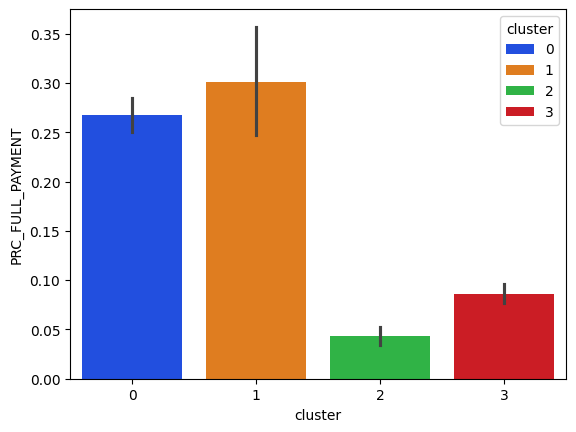

In [37]:
sns.barplot(data=df_kmeans, x="cluster", y="PRC_FULL_PAYMENT",hue="cluster", palette="bright")

**SARAN BISNIS**

1. Untuk Cluster 1 (Big Spender) kita bisa tawarkan program untuk Loyalitas Customer. Contohnya kita bisa tawarkan penammbahkan LIMIT agar customer pada  Cluster 1 bisa Spending lebih banyak lagi. Hal ini juga sudah dipertimbangkan dari jumlah PAYMENT dan PRC_FULL_PAYMENT yang ada pada Cluster 1 yang nilainya juga tinggi. Jadi potensi mereka untuk membeli lebih akan besar.

2. Untuk Cluster 2 (Calon Big Spender). Karena mereka memiliki sisa BALANCE yang sangat besar dan PURCHASE yang sedikit. Kita bisa bagikan informasi-informasi seputar promo lewat e-mail ataupun Social Media untuk produk-produk yang sering dibeli menggunakan Kartu Kredit. Misalnya produk elektronik, kendaraan atau bahkan rumah. Untuk menarik perhatian customer untuk spending lebih banyak.

3. Untuk Cluster 0 dan 3 (Little Spender dan Darurat Spender). Kita bisa lakukan hal yang sama seperti 'Calon Big Spender', bagikan promosi untuk barang tetapi untuk produk yang lebih kecil/murah. Misalnya Kopi di kedai kopi, aplikasi pesan antar, aplikasi transportasi, pembelian kebutuhan hiburan (tiket bioskop, in-app purchase, website subscription) dan lain sebagainya.

# MODEL SAVING

In [38]:
#Save Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('kmeans.pkl', 'wb') as file_4:
  pickle.dump(model, file_4)